In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from plotnine import *
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
import seaborn as sns

View original data categories:

In [3]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Potential separation of columns into qualitative and quantitative:

col_names = list(train_df.columns.values)

Qualitative columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition','MoSold', 'YrSold', 'OverallQual', 'OverallCond']

Quantitative columns: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath',
'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
'MiscVal','SalePrice']

Other: 'Id'

Load the data:

In [4]:
pd.set_option("display.max_rows", 15)
train_df = pd.read_csv("train.csv")
train_df = train_df.set_index("Id")
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500


In [5]:
test_df = pd.read_csv("test.csv")
test_df = test_df.set_index("Id")
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml


Combine test and train data to remove unnecessary data in both at the same time:

In [6]:
full_df = pd.concat((train_df, test_df))
full_df

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546,546,0,NaN,3,Twnhs,TA,No,408.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006


Check for missing data:

['GarageArea', 'SaleType', 'KitchenQual', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageCars', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st', 'BsmtUnfSF', 'Electrical', 'Functional', 'Utilities', 'BsmtHalfBath', 'BsmtFullBath', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond', 'GarageQual', 'LotFrontage', 'FireplaceQu', 'SalePrice', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']


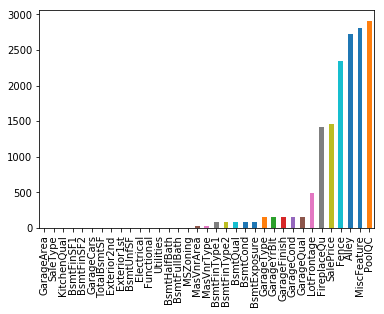

In [7]:
def get_missing(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace = True)
    missing_list = missing.index.tolist()
    
    return missing, missing_list

missing, missing_list = get_missing(full_df)
print(missing_list)
missing.plot.bar()

In [8]:
qual_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
quant_cols = ['LotFrontage', 'MasVnrArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

print(sorted(qual_cols))
print("Number of qualitative columns: {}\n".format(len(qual_cols)))
print(sorted(quant_cols))
print("Number of quantitative columns: {}\n".format(len(quant_cols)))

missing_qual = list([x for x in set(quant_cols) if x in set(missing_list)])
sorted(missing_qual).remove("SalePrice")
print("Missing values in these quantitative columns: {}\n".format(missing_qual))

missing_qual_df = full_df[missing_qual]

missing_qual_df[missing_qual_df.isnull().any(axis=1)]

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
Number of qualitative columns: 46

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorch

,GarageCars,MasVnrArea,GarageYrBlt,BsmtHalfBath,BsmtFinSF1,SalePrice,BsmtFullBath,TotalBsmtSF,BsmtUnfSF,GarageArea,LotFrontage,BsmtFinSF2
Id,,,,,,,,,,,,
8,2.0,240.0,1973.0,0.0,859.0,200000.0,1.0,1107.0,216.0,484.0,NaN,32.0
13,1.0,0.0,1962.0,0.0,737.0,144000.0,1.0,912.0,175.0,352.0,NaN,0.0
15,1.0,212.0,1960.0,0.0,733.0,157000.0,1.0,1253.0,520.0,352.0,NaN,0.0
17,2.0,180.0,1970.0,0.0,578.0,149000.0,1.0,1004.0,426.0,480.0,NaN,0.0
25,1.0,0.0,1968.0,0.0,188.0,154000.0,1.0,1060.0,204.0,270.0,NaN,668.0
32,1.0,0.0,1966.0,0.0,0.0,149350.0,0.0,1228.0,1228.0,271.0,NaN,0.0
40,0.0,0.0,NaN,0.0,0.0,82000.0,0.0,0.0,0.0,0.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,1.0,0.0,1970.0,0.0,408.0,NaN,0.0,546.0,138.0,286.0,21.0,0.0


Replace N/A values:

In [9]:
full_df['Functional'] = full_df['Functional'].fillna("Typ")

zero_fill = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea',
             'GarageYrBlt', 'GarageArea', 'GarageCars']
for col in zero_fill:
    full_df[col] = full_df[col].fillna(0)

none_fill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'MasVnrType', 'MSSubClass', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in none_fill:
    full_df[col] = full_df[col].fillna("None")
    
mode_fill = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
             'SaleType', 'MSZoning']
for col in mode_fill:
    full_df[col] = full_df[col].fillna(full_df[col].mode()[0])
    
full_df['LotFrontage'] = full_df.groupby(
    'Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))

In [10]:
full_df[qual_cols]=full_df[qual_cols].astype("category")
full_df["Alley"]

Id
1       None
2       None
3       None
4       None
5       None
6       None
7       None
        ... 
2913    None
2914    None
2915    None
2916    None
2917    None
2918    None
2919    None
Name: Alley, Length: 2919, dtype: category
Categories (3, object): [Grvl, None, Pave]

In [11]:
full_df[quant_cols] = full_df[quant_cols].astype("float64")
full_df["GarageArea"]

Id
1       548.0
2       460.0
3       608.0
4       642.0
5       836.0
6       480.0
7       636.0
        ...  
2913    286.0
2914      0.0
2915      0.0
2916    286.0
2917    576.0
2918      0.0
2919    650.0
Name: GarageArea, Length: 2919, dtype: float64

Combine together close features:

In [12]:
full_df["TotalArea"] = full_df["TotalBsmtSF"] + full_df["1stFlrSF"] + full_df["2ndFlrSF"]
quant_cols.append("TotalArea")

Check for duplicate rows:

In [13]:
full_df.duplicated().sum()

0

Double check if there are any missing values left:

['Utilities', 'SalePrice']


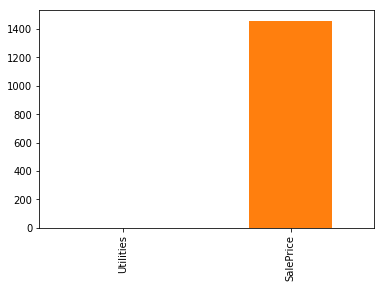

In [14]:
missing, missing_list = get_missing(full_df)
print(missing_list)
missing.plot.bar()

Remove unuseful feature:

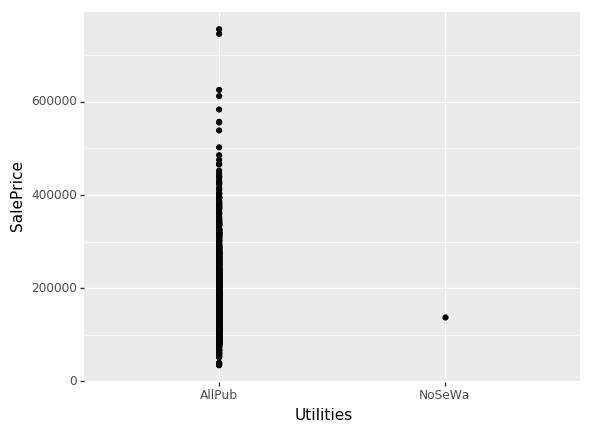

<ggplot: (8791798309759)>

In [15]:
(ggplot(train_df)
+aes("Utilities","SalePrice")
+geom_point())

In [16]:
full_df = full_df.drop("Utilities", axis = 1)

Split back to test and train data:

In [17]:
train_df = full_df[:1460]
test_df  = full_df[1460:].drop("SalePrice", axis = 1)
test_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalArea
Id,,,,,,,,,,,,,,,,,,,,,
1461,896.0,0.0,0.0,None,2.0,1Fam,TA,No,468.0,144.0,...,WD,120.0,Pave,5.0,882.0,140.0,1961.0,1961.0,2010.0,1778.0
1462,1329.0,0.0,0.0,None,3.0,1Fam,TA,No,923.0,0.0,...,WD,0.0,Pave,6.0,1329.0,393.0,1958.0,1958.0,2010.0,2658.0
1463,928.0,701.0,0.0,None,3.0,1Fam,TA,No,791.0,0.0,...,WD,0.0,Pave,6.0,928.0,212.0,1997.0,1998.0,2010.0,2557.0
1464,926.0,678.0,0.0,None,3.0,1Fam,TA,No,602.0,0.0,...,WD,0.0,Pave,7.0,926.0,360.0,1998.0,1998.0,2010.0,2530.0
1465,1280.0,0.0,0.0,None,2.0,TwnhsE,TA,No,263.0,0.0,...,WD,144.0,Pave,5.0,1280.0,0.0,1992.0,1992.0,2010.0,2560.0
1466,763.0,892.0,0.0,None,3.0,1Fam,TA,No,0.0,0.0,...,WD,0.0,Pave,7.0,763.0,157.0,1993.0,1994.0,2010.0,2418.0
1467,1187.0,0.0,0.0,None,3.0,1Fam,TA,No,935.0,0.0,...,WD,0.0,Pave,6.0,1168.0,483.0,1992.0,2007.0,2010.0,2355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546.0,546.0,0.0,None,3.0,Twnhs,TA,No,408.0,0.0,...,WD,0.0,Pave,5.0,546.0,0.0,1970.0,1970.0,2006.0,1638.0


In [18]:
qual_cols.remove("Utilities")
quant_cols.remove("SalePrice")

Explore data visually:

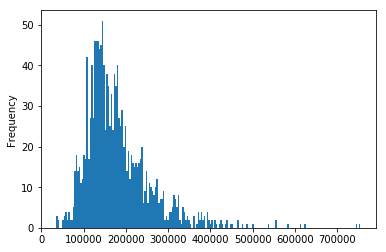

In [19]:
train_df["SalePrice"].plot.hist(bins=200)

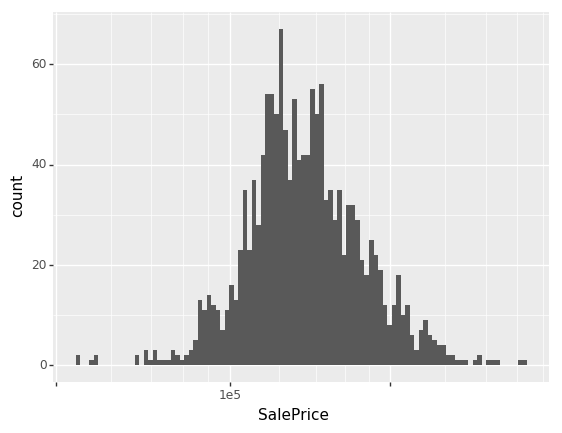

<ggplot: (8791798356116)>

In [20]:
(ggplot(train_df)
+ aes('SalePrice')
+ scale_x_log10()
+ geom_histogram(bins = 100))

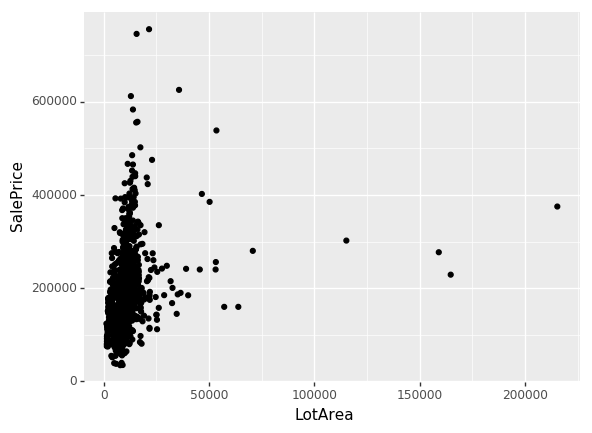

<ggplot: (-9223363245056419815)>

In [21]:
(ggplot(train_df)
+aes("LotArea", "SalePrice")
+geom_point())

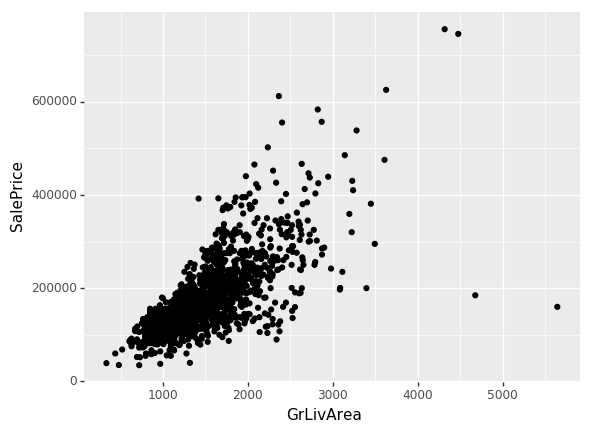

<ggplot: (8791798314693)>

In [22]:
(ggplot(train_df)
+aes("GrLivArea", "SalePrice")
+geom_point())

In [23]:
#remove outliers on bottom right
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

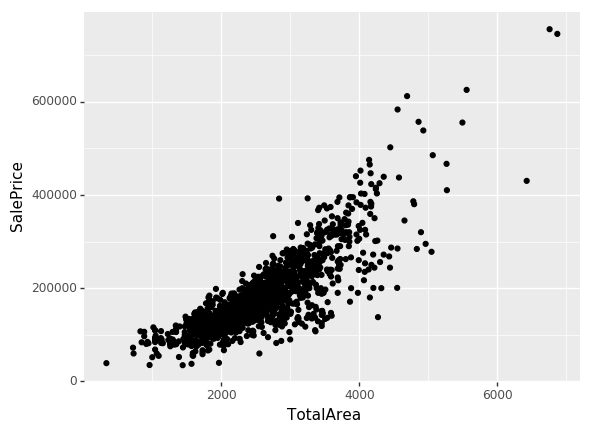

<ggplot: (8791798079166)>

In [24]:
(ggplot(train_df)
+aes("TotalArea", "SalePrice")
+geom_point())

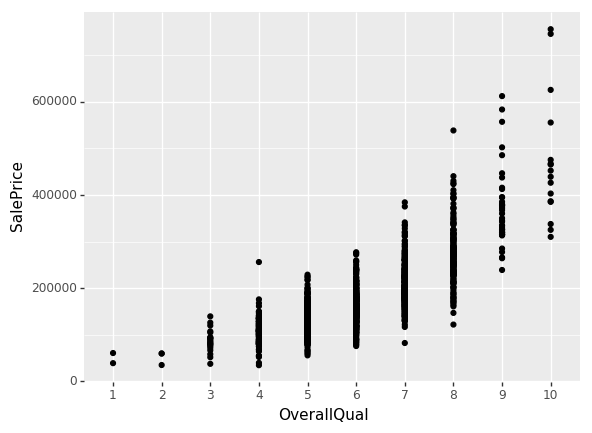

<ggplot: (-9223363245056611787)>

In [25]:
(ggplot(train_df)
+aes("OverallQual", "SalePrice")
+geom_point())

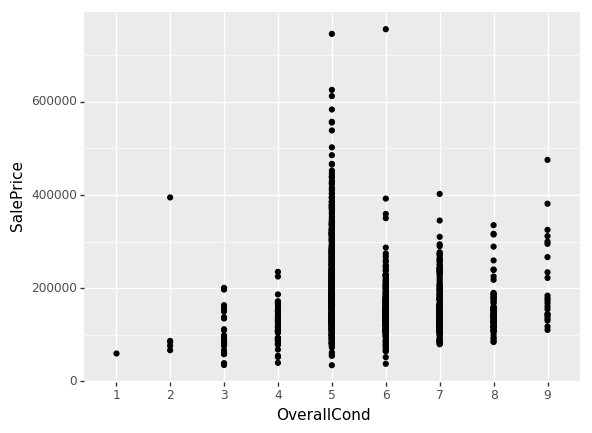

<ggplot: (-9223363245056736750)>

In [26]:
(ggplot(train_df)
+aes("OverallCond", "SalePrice")
+geom_point())

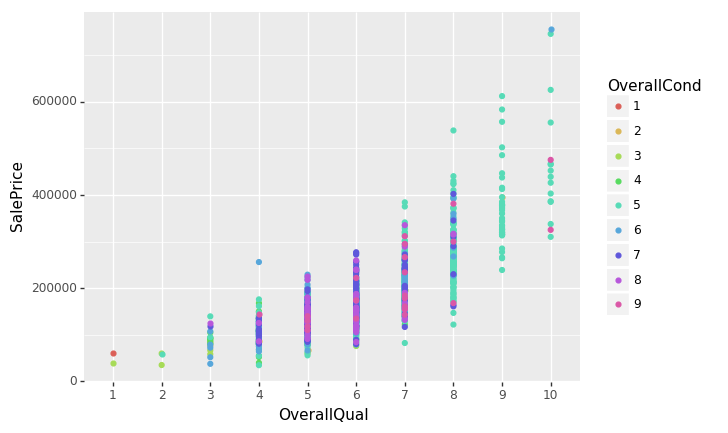

<ggplot: (8791797982244)>

In [27]:
(ggplot(train_df)
+aes("OverallQual", "SalePrice", color = "OverallCond")
+geom_point())

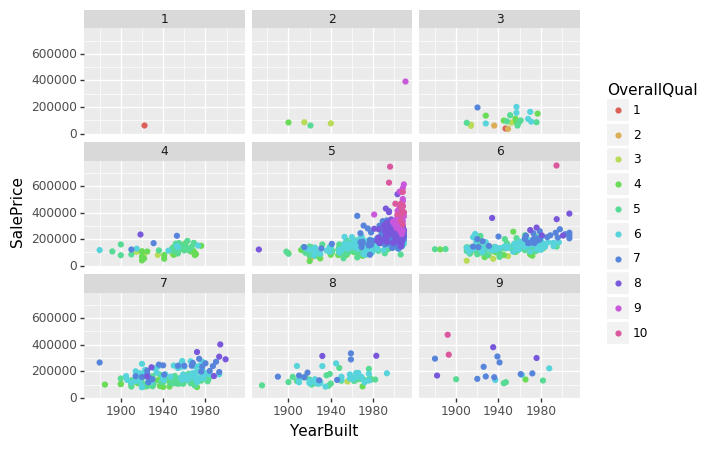

<ggplot: (8791798147553)>

In [28]:
(ggplot(train_df)
+aes("YearBuilt", "SalePrice", color = "OverallQual")
+geom_point()
+facet_wrap("~OverallCond"))

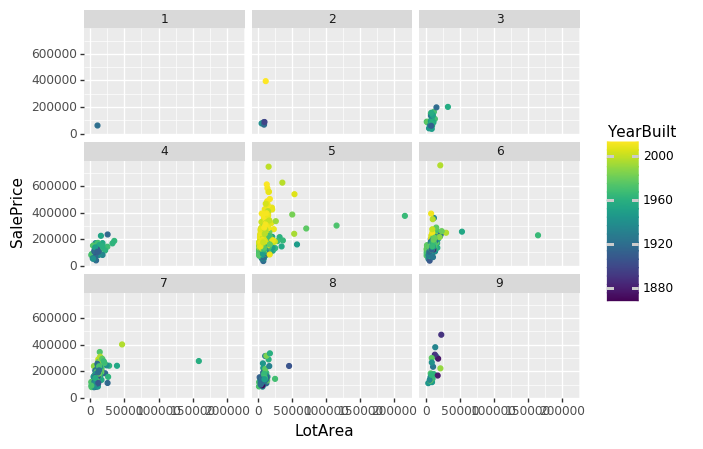

<ggplot: (-9223363245057186002)>

In [29]:
(ggplot(train_df)
+aes("LotArea", "SalePrice", color = "YearBuilt")
+geom_point()
+facet_wrap("~OverallCond"))

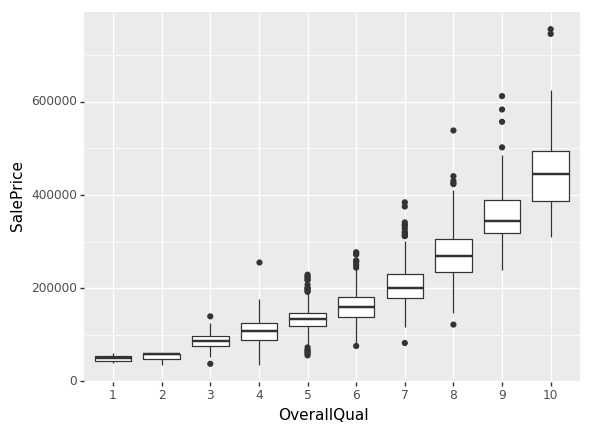

<ggplot: (8791797928098)>

In [30]:
(ggplot(train_df)
+aes("OverallQual","SalePrice")
+geom_boxplot())

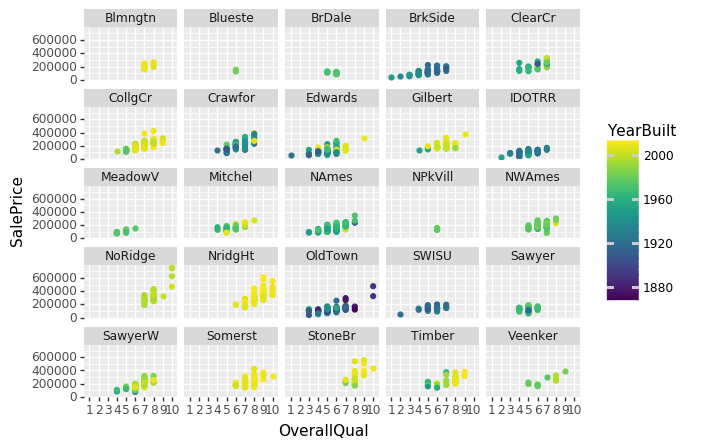

<ggplot: (8791798050217)>

In [31]:
(ggplot(train_df)
+aes("OverallQual", "SalePrice", color = "YearBuilt")
+geom_point()
+facet_wrap("Neighborhood"))

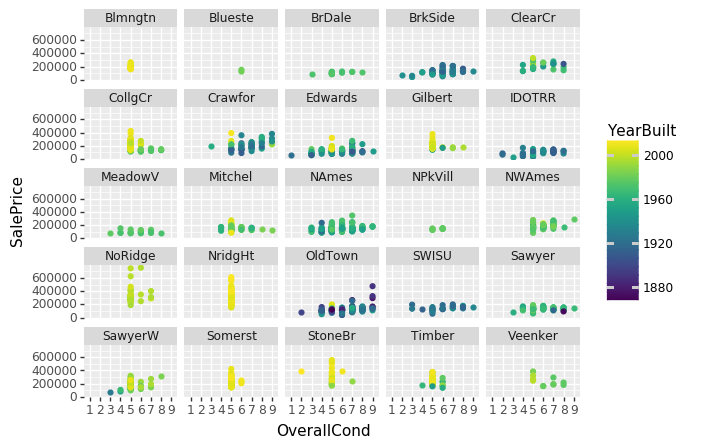

<ggplot: (8791798055032)>

In [32]:
(ggplot(train_df)
+aes("OverallCond", "SalePrice", color = "YearBuilt")
+geom_point()
+facet_wrap("Neighborhood"))

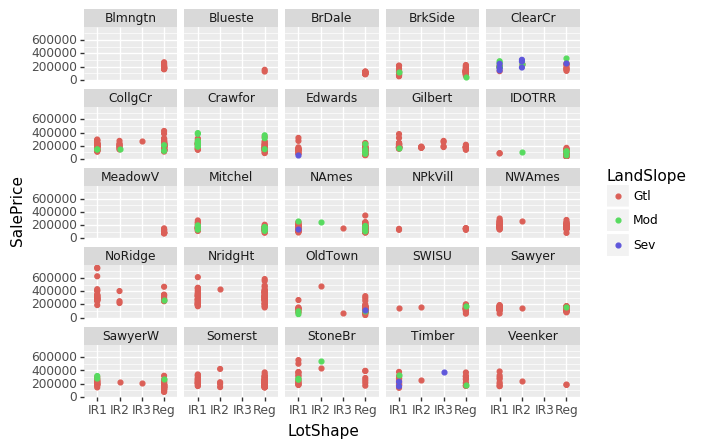

<ggplot: (-9223363245059808652)>

In [33]:
(ggplot(train_df)
+aes("LotShape", "SalePrice", color = "LandSlope")
+geom_point()
+facet_wrap("Neighborhood"))

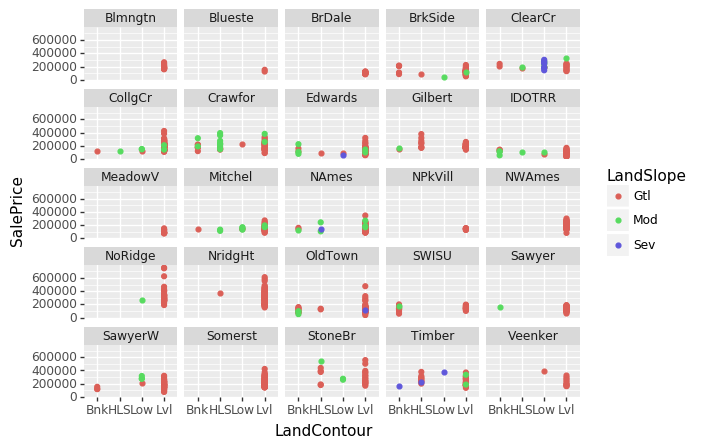

<ggplot: (8791795903338)>

In [34]:
#kind and severety of slope
(ggplot(train_df)
+aes("LandContour", "SalePrice", color = "LandSlope")
+geom_point()
+facet_wrap("Neighborhood"))

In [35]:
f = pd.melt(train_df, id_vars=["SalePrice"], value_vars=qual_cols)
f

,SalePrice,variable,value
0,208500.0,MSSubClass,60
1,181500.0,MSSubClass,20
2,223500.0,MSSubClass,60
3,140000.0,MSSubClass,70
4,250000.0,MSSubClass,60
5,143000.0,MSSubClass,50
6,307000.0,MSSubClass,20
...,...,...,...
65603,84500.0,SaleCondition,Abnorml
65604,185000.0,SaleCondition,Normal


/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


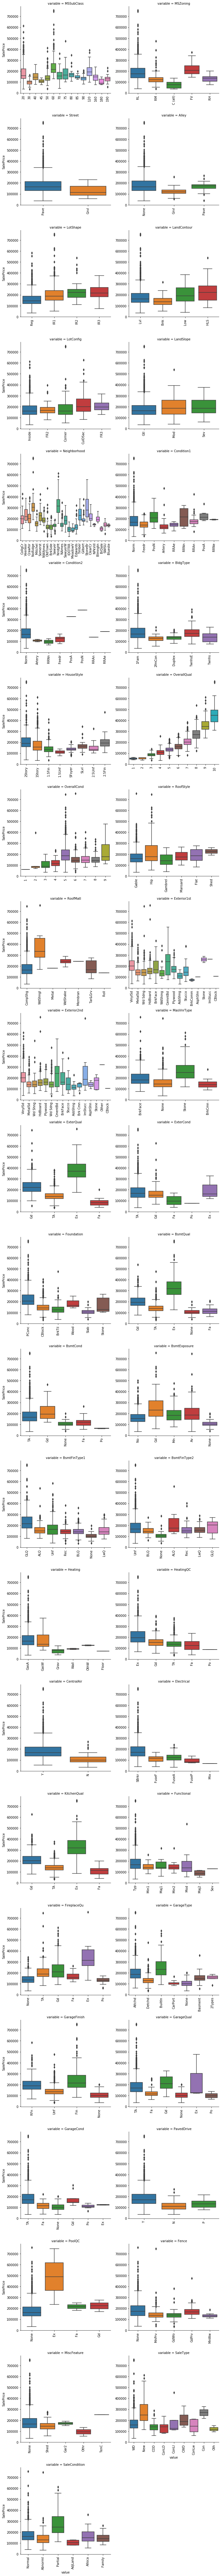

In [36]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

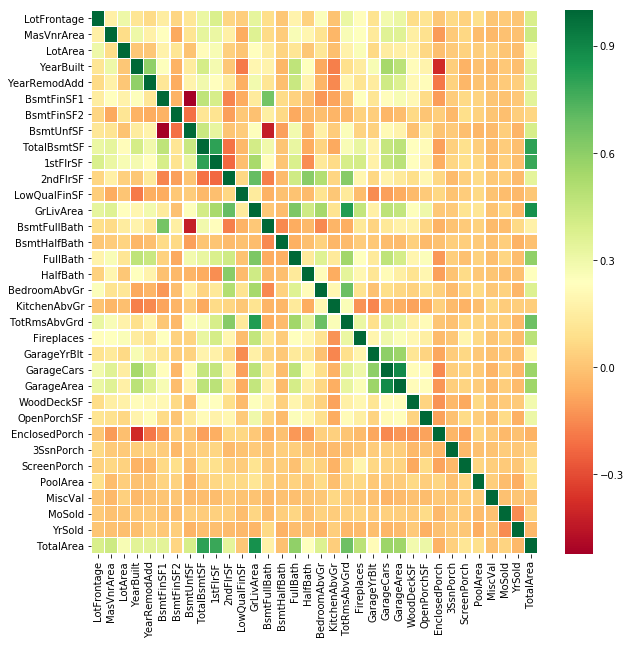

In [37]:
plt.figure(1, figsize=(10,10))
corr = train_df[quant_cols].corr()
sns.heatmap(corr, cmap='RdYlGn', linewidths=0.2)

In [38]:
train_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalArea
Id,,,,,,,,,,,,,,,,,,,,,
1,856.0,854.0,0.0,None,3.0,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8.0,856.0,0.0,2003.0,2003.0,2008.0,2566.0
2,1262.0,0.0,0.0,None,3.0,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2524.0
3,920.0,866.0,0.0,None,3.0,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6.0,920.0,0.0,2001.0,2002.0,2008.0,2706.0
4,961.0,756.0,0.0,None,3.0,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7.0,756.0,0.0,1915.0,1970.0,2006.0,2473.0
5,1145.0,1053.0,0.0,None,4.0,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9.0,1145.0,192.0,2000.0,2000.0,2008.0,3343.0
6,796.0,566.0,320.0,None,1.0,1Fam,TA,No,732.0,0.0,...,WD,0.0,Pave,5.0,796.0,40.0,1993.0,1995.0,2009.0,2158.0
7,1694.0,0.0,0.0,None,3.0,1Fam,TA,Av,1369.0,0.0,...,WD,0.0,Pave,7.0,1686.0,255.0,2004.0,2005.0,2007.0,3380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1140.0,0.0,0.0,None,3.0,1Fam,TA,No,0.0,0.0,...,WD,0.0,Pave,6.0,1140.0,36.0,2006.0,2006.0,2006.0,2280.0


In [39]:
full_df = pd.concat((train_df, test_df))

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [40]:
full_df.to_csv("full_df.csv")